# StockUniverse Class module test jupyternotebook

-바로 테스트시 필요한 csv : 'sp500_score_df.csv' , './sp500_ohlcv/AMD_ohlcv.csv','cnn_score_df.csv'


In [1]:
import os 
os.chdir("/Users/mac/Desktop/Dinger")

In [2]:
from utils import *
from Dinger.universe_module_us import *
from Dinger.database_module import *
from resnet import *

In [ ]:
# import sotck list form financedata reader 
import FinanceDataReader as fdr
sp500_list = fdr.StockListing('S&P500')

In [4]:
# database module에서 생성한 sp500 list fundamental data 를 가져옵니다. (database module의 output)
df = pd.read_csv('DF/sp500_score_df.csv', index_col=0)
df.head()

,Symbol,Name,Sector,Industry,Sales,Revenue,MarCap,PER,PBR,ROA,ROE,Volume,Price,Beta,DIVIDEND
0,MMM,3M,Industrials,Industrial Conglomerates,35090000000.00,4150000000.00,68570000000.00,17.38,5.16,8.90,28.50,3021350.00,122.83,0.99,4.80
1,AOS,A. O. Smith,Industrials,Building Products,3850000000.00,517200000.00,8760000000.00,17.27,4.88,15.30,28.20,450723.00,55.01,1.19,1.99
2,ABT,Abbott,Health Care,Health Care Equipment,45550000000.00,8550000000.00,188760000000.00,22.71,5.25,11.50,24.10,988320.00,106.36,0.71,1.72
3,ABBV,AbbVie,Health Care,Pharmaceuticals,57350000000.00,12570000000.00,249890000000.00,20.12,17.18,8.60,83.90,1529196.00,141.21,0.68,3.97
4,ABMD,Abiomed,Health Care,Health Care Equipment,1060000000.00,217600000.00,12390000000.00,58.92,8.28,13.40,14.90,56097.00,266.36,1.37,NaN


## StockUniverse class initialize

In [5]:
#initialize scoring instacne 
test = StockUniverse(stock_list = sp500_list)

In [6]:
# 입력한 fundamental df의 sector별 standard_df를 구합니다. default = mean
# median기준으로 standard df 구하기

test.get_standard_df(df, mode = 'median')


,Sales,Revenue,MarCap,PER,PBR,ROA,ROE,Volume,Price,Beta,DIVIDEND
Sector,,,,,,,,,,,
Communication Services,18230000000.00,2000000000.00,31105000000.00,14.29,2.19,4.40,13.10,3459267.50,51.02,0.91,3.23
Consumer Discretionary,12540000000.00,1421000000.00,19525000000.00,19.74,4.25,8.15,19.80,1029481.00,96.56,1.29,1.98
Consumer Staples,18365000000.00,1765000000.00,43925000000.00,25.86,4.81,7.55,21.40,639726.00,79.19,0.56,2.57
Energy,21400000000.00,3830000000.00,42060000000.00,9.86,2.53,11.80,26.00,2063642.00,69.86,1.55,2.83
Financials,10430000000.00,2090000000.00,29980000000.00,12.93,1.67,1.80,13.30,650356.00,100.29,1.11,2.42
Health Care,12885000000.00,1445000000.00,34470000000.00,25.93,4.17,7.60,18.40,440647.00,201.51,0.87,1.24
Industrials,14060000000.00,1100000000.00,27830000000.00,24.19,4.90,8.30,23.00,389934.00,123.97,1.13,1.58
Information Technology,8645000000.00,1155000000.00,38405000000.00,28.64,6.53,10.90,24.50,1345572.50,141.43,1.17,1.69
Materials,14035000000.00,1165000000.00,24965000000.00,22.21,3.30,6.40,20.40,482742.50,106.11,1.03,1.88


In [7]:
test.get_standard_df(df)

,Sales,Revenue,MarCap,PER,PBR,ROA,ROE,Volume,Price,Beta,DIVIDEND
Sector,,,,,,,,,,,
Communication Services,57971923076.92,8395573913.04,177886153846.15,31.59,2.83,5.11,12.98,8010312.62,80.62,0.99,3.41
Consumer Discretionary,33889655172.41,2863767241.38,75775689655.17,28.18,33.77,8.87,1.39,4141986.05,288.64,1.36,2.22
Consumer Staples,56689375000.00,3372162500.00,80558750000.00,27.15,23.22,8.03,44.33,2267122.53,108.65,0.56,2.77
Energy,63800952380.95,7438857142.86,74061428571.43,12.33,3.83,11.76,-1.29,2767487.62,82.98,1.65,3.42
Financials,18689313846.15,4360496923.08,52215230769.23,18.76,4.21,3.38,15.56,1652542.42,139.34,1.08,2.38
Health Care,44730625000.00,3760759375.00,77937500000.00,31.33,78.74,9.68,33.34,1114089.50,222.13,0.90,1.67
Industrials,20487042253.52,1966200000.00,39401690140.85,24.73,5.67,9.00,20.18,1191361.18,158.13,1.15,1.63
Information Technology,22266842105.26,5027756578.95,122966842105.26,54.88,11.83,12.11,23.85,6007698.51,178.06,1.18,1.92
Materials,17785714285.71,2059400000.00,31400357142.86,25.81,5.58,8.51,34.90,994179.50,123.52,1.08,2.30


## CNN 으로 Stock 추세 확인

===== Value Info =====
Max Close : 108.58999633789062, Min Close: 63.36000061035156
Max Volume : 131142000.0, Min Volume: 51129100.0
===== complete generating wbt =====
Num of Up trend:0
Num of Down trend:17
Num of Side trend:4
===== complete generating image =====
Image shape:(21, 1, 64, 64)
Label shape:(21, 3)
80.0


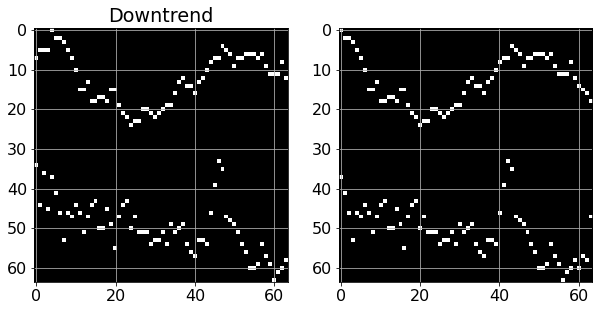

{'추세예측값': (0,)}

In [8]:
#data base에서 추출한 stock 한개의 cnn score구하기 (입력 dataframe)

ohlcv_data = pd.read_csv('DF/AMD_ohlcv.csv',index_col = 0)
test.get_cnn_score(ohlcv_data)

#### 여러stock의 score 추출시 사용할 list 입력

In [9]:
sp500_list

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


##### 여러 score 추출시 시간이 너무 많이 소요 돼 따로 학습, 저장 후 불러와서 사용했음 

In [10]:
#stock list 입력
#test.get_many_cnn_score(path = 'sp500')


In [11]:
# 미리 저장한 df dictionary 형태로 가져오기 
cnn_score = pd.read_csv('DF/cnn_score_df.csv', index_col =0)
cnn_score = cnn_score.to_dict('dict')['0']
cnn_score

{'MMM': 0.0,
 'AOS': 0.0,
 'ABT': 0.0,
 'ABBV': 0.0,
 'ABMD': 0.0,
 'ACN': 0.0,
 'ATVI': 0.0,
 'ADM': 0.0,
 'ADBE': 0.0,
 'ADP': 0.0,
 'AAP': 0.0,
 'AES': 0.5,
 'AFL': 0.0,
 'A': 0.0,
 'APD': 0.0,
 'AKAM': 0.0,
 'ALK': 0.5,
 'ALB': 0.0,
 'ARE': 0.0,
 'ALGN': 0.0,
 'ALLE': 0.0,
 'LNT': 0.0,
 'ALL': 0.0,
 'GOOGL': 0.0,
 'GOOG': 0.0,
 'MO': 0.0,
 'AMZN': 0.0,
 'AMCR': 0.0,
 'AMD': 0.0,
 'AEE': 0.0,
 'AAL': 0.0,
 'AEP': 0.0,
 'AXP': 0.0,
 'AIG': 0.0,
 'AMT': 0.0,
 'AWK': 0.0,
 'AMP': 0.0,
 'ABC': 0.0,
 'AME': 0.0,
 'AMGN': 0.0,
 'APH': 0.0,
 'ADI': 0.0,
 'ANSS': 0.0,
 'AON': 0.0,
 'APA': 0.5,
 'AAPL': 0.0,
 'AMAT': 0.0,
 'APTV': 0.0,
 'ANET': 0.0,
 'AJG': 0.0,
 'AIZ': 0.0,
 'T': 0.0,
 'ATO': 0.0,
 'ADSK': 0.0,
 'AZO': 0.0,
 'AVB': 0.0,
 'AVY': 0.0,
 'BKR': 0.0,
 'BALL': 0.0,
 'BAC': 0.0,
 'BBWI': 1.0,
 'BAX': 0.0,
 'BDX': 0.0,
 'WRB': 0.0,
 'BRKB': nan,
 'BBY': 0.0,
 'BIO': 0.0,
 'TECH': 0.0,
 'BIIB': 0.0,
 'BLK': 0.0,
 'BK': 0.0,
 'BA': 0.5,
 'BKNG': 0.0,
 'BWA': 0.5,
 'BXP': 0.0,
 'BSX':

In [12]:
# cnn_score dictionary 분포 확인해보기
count_up = 0
count_down = 0
count_side = 0
for v in cnn_score.values():
    if v == 1 :
        count_up += 1
    elif v == 0 :
        count_down +=1
    else :
        count_side +=1
count_up, count_down, count_side

(5, 465, 32)

## SCORING 

In [13]:
#cnn score를 socred df 에 추가 
scored_df = test.add_cnn_score(df, cnn_score)

In [14]:
scored_df

,Symbol,Name,Sector,Industry,Sales,Revenue,MarCap,PER,PBR,ROA,ROE,Volume,Price,Beta,DIVIDEND,cnn_score
0,MMM,3M,Industrials,Industrial Conglomerates,35090000000.00,4150000000.00,68570000000.00,17.38,5.16,8.90,28.50,3021350.00,122.83,0.99,4.80,0.00
1,AOS,A. O. Smith,Industrials,Building Products,3850000000.00,517200000.00,8760000000.00,17.27,4.88,15.30,28.20,450723.00,55.01,1.19,1.99,0.00
2,ABT,Abbott,Health Care,Health Care Equipment,45550000000.00,8550000000.00,188760000000.00,22.71,5.25,11.50,24.10,988320.00,106.36,0.71,1.72,0.00
3,ABBV,AbbVie,Health Care,Pharmaceuticals,57350000000.00,12570000000.00,249890000000.00,20.12,17.18,8.60,83.90,1529196.00,141.21,0.68,3.97,0.00
4,ABMD,Abiomed,Health Care,Health Care Equipment,1060000000.00,217600000.00,12390000000.00,58.92,8.28,13.40,14.90,56097.00,266.36,1.37,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,6680000000.00,1480000000.00,33440000000.00,23.48,NaN,24.70,-17.80,377547.00,114.42,1.03,1.94,0.00
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,5800000000.00,497000000.00,15000000000.00,31.92,6.09,7.80,17.70,422894.00,293.50,1.67,NaN,0.00
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,7410000000.00,299600000.00,24210000000.00,83.93,2.06,1.00,1.90,428823.00,116.83,1.15,0.80,0.00
501,ZION,Zions Bancorporation,Financials,Regional Banks,2300000000.00,824000000.00,8630000000.00,10.73,1.66,0.90,13.00,1361713.00,57.30,1.23,2.86,0.00


### 다른 fundamental scores도 구하기 

In [15]:
test.get_score()

scored_df를 csv로 저장합니다.


,Symbol,Name,Sector,Industry,Sales,Revenue,MarCap,PER,PBR,ROA,...,Beta,DIVIDEND,cnn_score,Sales_score,Revenue_score,MarCap_score,ROA_score,ROE_score,PER_score,total_score
0,MMM,3M,Industrials,Industrial Conglomerates,35090000000.00,4150000000.00,68570000000.00,17.38,5.16,8.90,...,0.99,4.80,0.00,1.00,1.00,1.00,0.00,1.00,0.00,4.00
1,AOS,A. O. Smith,Industrials,Building Products,3850000000.00,517200000.00,8760000000.00,17.27,4.88,15.30,...,1.19,1.99,0.00,0.00,0.00,0.00,1.00,1.00,0.00,2.00
2,ABT,Abbott,Health Care,Health Care Equipment,45550000000.00,8550000000.00,188760000000.00,22.71,5.25,11.50,...,0.71,1.72,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00
3,ABBV,AbbVie,Health Care,Pharmaceuticals,57350000000.00,12570000000.00,249890000000.00,20.12,17.18,8.60,...,0.68,3.97,0.00,1.00,1.00,1.00,0.00,1.00,0.00,4.00
4,ABMD,Abiomed,Health Care,Health Care Equipment,1060000000.00,217600000.00,12390000000.00,58.92,8.28,13.40,...,1.37,NaN,0.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,6680000000.00,1480000000.00,33440000000.00,23.48,NaN,24.70,...,1.03,1.94,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,5800000000.00,497000000.00,15000000000.00,31.92,6.09,7.80,...,1.67,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,7410000000.00,299600000.00,24210000000.00,83.93,2.06,1.00,...,1.15,0.80,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
501,ZION,Zions Bancorporation,Financials,Regional Banks,2300000000.00,824000000.00,8630000000.00,10.73,1.66,0.90,...,1.23,2.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [16]:
#roe, roa 등등의 score를 구합니다.
test.get_score(scaling = "mm")

MinMax scaler 적용한 scored_df를 csv로 저장합니다.


,Symbol,Name,Sector,Industry,Sales,Revenue,MarCap,PER,PBR,ROA,ROE,Volume,Price,Beta,DIVIDEND,cnn_score,total_score
0,MMM,3M,Industrials,Industrial Conglomerates,0.06,0.04,0.03,0.01,0.00,0.38,0.45,0.04,0.03,0.25,0.47,0.00,1.76
1,AOS,A. O. Smith,Industrials,Building Products,0.01,0.01,0.00,0.01,0.00,0.47,0.45,0.01,0.01,0.30,0.19,0.00,1.45
2,ABT,Abbott,Health Care,Health Care Equipment,0.08,0.09,0.07,0.02,0.00,0.42,0.45,0.01,0.02,0.17,0.17,0.00,1.49
3,ABBV,AbbVie,Health Care,Pharmaceuticals,0.10,0.13,0.10,0.02,0.00,0.38,0.49,0.02,0.03,0.17,0.39,0.00,1.81
4,ABMD,Abiomed,Health Care,Health Care Equipment,0.00,0.00,0.00,0.05,0.00,0.44,0.44,0.00,0.06,0.35,NaN,0.00,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,0.01,0.01,0.01,0.02,NaN,0.59,0.41,0.01,0.03,0.26,0.19,0.00,1.53
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,0.01,0.00,0.00,0.03,0.00,0.37,0.44,0.01,0.07,0.43,NaN,0.00,1.36
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,0.01,0.00,0.01,0.07,0.00,0.28,0.43,0.01,0.03,0.29,0.08,0.00,1.20
501,ZION,Zions Bancorporation,Financials,Regional Banks,0.00,0.01,0.00,0.01,0.00,0.28,0.44,0.02,0.01,0.31,0.28,0.00,1.36


In [17]:
#roe, roa 등등의 score를 구합니다.
test.get_score(scaling = "std")

standard scaler 적용한 scored_df를 csv로 저장합니다.


,Symbol,Name,Sector,Industry,Sales,Revenue,MarCap,PER,PBR,ROA,ROE,Volume,Price,Beta,DIVIDEND,cnn_score,total_score
0,MMM,3M,Industrials,Industrial Conglomerates,0.09,0.07,-0.02,-0.23,-0.07,0.12,0.10,0.04,-0.16,-0.15,1.66,-0.26,1.18
1,AOS,A. O. Smith,Industrials,Building Products,-0.44,-0.40,-0.34,-0.23,-0.07,0.96,0.10,-0.31,-0.42,0.30,-0.25,-0.26,-1.36
2,ABT,Abbott,Health Care,Health Care Equipment,0.27,0.63,0.61,-0.15,-0.07,0.46,0.05,-0.24,-0.22,-0.78,-0.43,-0.26,-0.13
3,ABBV,AbbVie,Health Care,Pharmaceuticals,0.48,1.15,0.93,-0.19,-0.01,0.08,0.73,-0.17,-0.09,-0.85,1.10,-0.26,2.90
4,ABMD,Abiomed,Health Care,Health Care Equipment,-0.49,-0.43,-0.32,0.36,-0.06,0.71,-0.06,-0.37,0.39,0.70,NaN,-0.26,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,-0.40,-0.27,-0.21,-0.14,NaN,2.21,-0.43,-0.32,-0.19,-0.06,-0.28,-0.26,-0.36
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,-0.41,-0.40,-0.30,-0.02,-0.07,-0.03,-0.03,-0.32,0.50,1.37,NaN,-0.26,0.03
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,-0.38,-0.42,-0.26,0.72,-0.09,-0.93,-0.21,-0.32,-0.18,0.21,-1.05,-0.26,-3.17
501,ZION,Zions Bancorporation,Financials,Regional Banks,-0.47,-0.36,-0.34,-0.33,-0.09,-0.95,-0.08,-0.19,-0.41,0.39,0.34,-0.26,-2.73


### total score기준 top n sector 
- 나머지 sector별 합도 보여줌

In [18]:
test.top_n_sectors(2)

scored_df를 csv로 저장합니다.
Total Score TOP 2 Sectors 는 ['Industrials', 'Information Technology']입니다.


,cnn_score,Sales_score,Revenue_score,MarCap_score,ROA_score,ROE_score,PER_score,total_score
Sector,,,,,,,,
Industrials,2.00,21.00,22.00,23.00,31.00,41.00,29.00,169.00
Information Technology,1.00,18.00,16.00,14.00,29.00,39.00,14.00,131.00
Consumer Discretionary,5.50,11.00,17.00,9.00,27.00,44.00,12.00,125.50
Health Care,3.50,16.00,19.00,17.00,27.00,12.00,23.00,117.50
Financials,0.50,21.00,16.00,21.00,20.00,20.00,18.00,116.50
Consumer Staples,0.00,8.00,10.00,9.00,13.00,7.00,14.00,61.00
Real Estate,0.00,10.00,9.00,11.00,11.00,10.00,6.00,57.00
Utilities,1.00,13.00,9.00,8.00,10.00,8.00,8.00,57.00
Materials,1.50,8.00,8.00,10.00,10.00,8.00,11.00,56.50


['Industrials', 'Information Technology']

In [19]:
test.top_n_sectors(2, scaling = 'mm')

MinMax scaler 적용한 scored_df를 csv로 저장합니다.
Total Score TOP 2 Sectors 는 ['Information Technology', 'Industrials']입니다.


,cnn_score,total_score
Sector,,
Information Technology,1.00,120.40
Industrials,2.00,99.37
Consumer Discretionary,5.50,95.53
Health Care,3.50,94.18
Financials,0.50,92.31
Consumer Staples,0.00,46.93
Real Estate,0.00,44.72
Energy,3.50,42.91
Materials,1.50,40.98


['Information Technology', 'Industrials']

In [20]:
test.top_n_sectors(2, scaling = 'std')

standard scaler 적용한 scored_df를 csv로 저장합니다.
Total Score TOP 2 Sectors 는 ['Information Technology', 'Consumer Discretionary']입니다.


,cnn_score,total_score
Sector,,
Information Technology,-13.13,121.53
Consumer Discretionary,21.21,89.44
Energy,17.33,74.19
Communication Services,2.97,47.00
Health Care,6.07,25.05
Consumer Staples,-8.39,-22.29
Materials,2.45,-24.20
Real Estate,-8.12,-39.45
Industrials,-5.56,-80.29


['Information Technology', 'Consumer Discretionary']

### top_n stocks보여주기 

In [21]:
# 한 개 sector의 top 10 기업
test.top_n_stocks(['Industrials'],10)

scored_df를 csv로 저장합니다.
Sector: Industrials 의 top 10 stocks(ticker ,stock name)는 [['HON' 'Honeywell']
 ['NOC' 'Northrop Grumman']
 ['UNP' 'Union Pacific Corporation']
 ['LMT' 'Lockheed Martin']
 ['UPS' 'United Parcel Service']
 ['BA' 'Boeing']
 ['CSX' 'CSX']
 ['RTX' 'Raytheon Technologies']
 ['ITW' 'Illinois Tool Works']
 ['WM' 'Waste Management']] 입니다.


,Symbol,Name,Sector,Industry,Sales,Revenue,MarCap,PER,PBR,ROA,...,Beta,DIVIDEND,cnn_score,Sales_score,Revenue_score,MarCap_score,ROA_score,ROE_score,PER_score,total_score
235,HON,Honeywell,Industrials,Industrial Conglomerates,34460000000.00,5080000000.00,124400000000.00,25.23,7.16,8.00,...,1.06,2.12,0.00,1.00,1.00,1.00,0.00,1.00,1.00,5.00
342,NOC,Northrop Grumman,Industrials,Aerospace & Defense,34960000000.00,5670000000.00,74360000000.00,13.43,5.49,13.50,...,0.61,1.43,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
460,UNP,Union Pacific Corporation,Industrials,Railroads,23430000000.00,6850000000.00,145260000000.00,21.81,11.52,10.80,...,1.13,2.22,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
288,LMT,Lockheed Martin,Industrials,Aerospace & Defense,64170000000.00,4710000000.00,110510000000.00,24.22,9.73,9.10,...,0.66,2.68,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
462,UPS,United Parcel Service,Industrials,Air Freight & Logistics,100100000000.00,10930000000.00,171640000000.00,16.06,10.74,15.90,...,1.07,3.04,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
71,BA,Boeing,Industrials,Aerospace & Defense,60740000000.00,5278000000.00,94410000000.00,NaN,NaN,-3.80,...,1.35,NaN,0.50,1.00,1.00,1.00,0.00,1.00,0.00,4.50
135,CSX,CSX,Industrials,Railroads,13950000000.00,3940000000.00,67150000000.00,17.63,5.19,9.80,...,1.20,1.27,0.00,0.00,1.00,1.00,1.00,1.00,0.00,4.00
395,RTX,Raytheon Technologies,Industrials,Aerospace & Defense,65290000000.00,4490000000.00,127460000000.00,29.35,1.84,2.80,...,1.12,2.51,0.00,1.00,1.00,1.00,0.00,0.00,1.00,4.00
246,ITW,Illinois Tool Works,Industrials,Industrial Machinery,15190000000.00,2650000000.00,63480000000.00,24.61,19.08,16.70,...,1.12,2.52,0.00,0.00,1.00,1.00,1.00,1.00,0.00,4.00
482,WM,Waste Management,Industrials,Environmental & Facilities Services,19030000000.00,2140000000.00,71870000000.00,33.96,10.01,7.30,...,0.76,1.50,0.00,0.00,1.00,1.00,0.00,1.00,1.00,4.00


{'Industrials':     Symbol                       Name
 235    HON                  Honeywell
 342    NOC           Northrop Grumman
 460    UNP  Union Pacific Corporation
 288    LMT            Lockheed Martin
 462    UPS      United Parcel Service
 71      BA                     Boeing
 135    CSX                        CSX
 395    RTX      Raytheon Technologies
 246    ITW        Illinois Tool Works
 482     WM           Waste Management}

In [22]:
# 한 개 sector의 top 10 기업
test.top_n_stocks(['Industrials', 'Information Technology'],10)

scored_df를 csv로 저장합니다.
Sector: Information Technology 의 top 10 stocks(ticker ,stock name)는 [['ACN' 'Accenture']
 ['V' 'Visa Inc.']
 ['MSFT' 'Microsoft']
 ['AAPL' 'Apple Inc.']
 ['QCOM' 'Qualcomm']
 ['AVGO' 'Broadcom Inc.']
 ['NVDA' 'Nvidia']
 ['CSCO' 'Cisco']
 ['TXN' 'Texas Instruments']
 ['MA' 'Mastercard']] 입니다.


,Symbol,Name,Sector,Industry,Sales,Revenue,MarCap,PER,PBR,ROA,...,Beta,DIVIDEND,cnn_score,Sales_score,Revenue_score,MarCap_score,ROA_score,ROE_score,PER_score,total_score
5,ACN,Accenture,Information Technology,IT Consulting & Other Services,59590000000.00,6630000000.00,185100000000.00,28.64,8.74,15.00,...,1.22,1.31,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
475,V,Visa Inc.,Information Technology,Data Processing & Outsourced Services,28080000000.00,14270000000.00,418130000000.00,31.71,13.17,17.20,...,0.90,0.73,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
314,MSFT,Microsoft,Information Technology,Systems Software,198270000000.00,72740000000.00,1863880000000.00,26.13,11.31,21.00,...,0.94,0.98,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
45,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",387540000000.00,99630000000.00,2577880000000.00,27.00,45.40,28.10,...,1.24,0.56,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
391,QCOM,Qualcomm,Information Technology,Semiconductors,42140000000.00,12860000000.00,139290000000.00,11.07,8.74,29.30,...,1.25,2.40,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
77,AVGO,Broadcom Inc.,Information Technology,Semiconductors,31680000000.00,9830000000.00,201410000000.00,21.94,9.77,13.50,...,1.12,3.26,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
347,NVDA,Nvidia,Information Technology,Semiconductors,29740000000.00,7740000000.00,324300000000.00,43.05,13.74,17.80,...,1.68,0.12,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
111,CSCO,Cisco,Information Technology,Communications Equipment,51560000000.00,11810000000.00,178780000000.00,15.64,4.53,12.40,...,0.94,3.45,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
444,TXN,Texas Instruments,Information Technology,Semiconductors,19590000000.00,8540000000.00,148750000000.00,17.79,10.62,34.90,...,1.02,2.83,0.00,0.00,1.00,1.00,1.00,1.00,0.00,4.00
301,MA,Mastercard,Information Technology,Data Processing & Outsourced Services,20860000000.00,9700000000.00,321410000000.00,34.29,53.21,26.50,...,1.06,0.58,0.00,0.00,1.00,1.00,1.00,1.00,0.00,4.00


{'Industrials':     Symbol                       Name
 235    HON                  Honeywell
 342    NOC           Northrop Grumman
 460    UNP  Union Pacific Corporation
 288    LMT            Lockheed Martin
 462    UPS      United Parcel Service
 71      BA                     Boeing
 135    CSX                        CSX
 395    RTX      Raytheon Technologies
 246    ITW        Illinois Tool Works
 482     WM           Waste Management,
 'Information Technology':     Symbol               Name
 5      ACN          Accenture
 475      V          Visa Inc.
 314   MSFT          Microsoft
 45    AAPL         Apple Inc.
 391   QCOM           Qualcomm
 77    AVGO      Broadcom Inc.
 347   NVDA             Nvidia
 111   CSCO              Cisco
 444    TXN  Texas Instruments
 301     MA         Mastercard}

### universe 구하기 2개 sectors 입력

In [23]:
test.get_universe(['Industrials', 'Information Technology'], 20)

scored_df를 csv로 저장합니다.


,Symbol,Name,Sector,Industry,Sales,Revenue,MarCap,PER,PBR,ROA,...,Beta,DIVIDEND,cnn_score,Sales_score,Revenue_score,MarCap_score,ROA_score,ROE_score,PER_score,total_score
5,ACN,Accenture,Information Technology,IT Consulting & Other Services,59590000000.00,6630000000.00,185100000000.00,28.64,8.74,15.00,...,1.22,1.31,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
475,V,Visa Inc.,Information Technology,Data Processing & Outsourced Services,28080000000.00,14270000000.00,418130000000.00,31.71,13.17,17.20,...,0.90,0.73,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
314,MSFT,Microsoft,Information Technology,Systems Software,198270000000.00,72740000000.00,1863880000000.00,26.13,11.31,21.00,...,0.94,0.98,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
45,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",387540000000.00,99630000000.00,2577880000000.00,27.00,45.40,28.10,...,1.24,0.56,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
391,QCOM,Qualcomm,Information Technology,Semiconductors,42140000000.00,12860000000.00,139290000000.00,11.07,8.74,29.30,...,1.25,2.40,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
77,AVGO,Broadcom Inc.,Information Technology,Semiconductors,31680000000.00,9830000000.00,201410000000.00,21.94,9.77,13.50,...,1.12,3.26,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
347,NVDA,Nvidia,Information Technology,Semiconductors,29740000000.00,7740000000.00,324300000000.00,43.05,13.74,17.80,...,1.68,0.12,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
111,CSCO,Cisco,Information Technology,Communications Equipment,51560000000.00,11810000000.00,178780000000.00,15.64,4.53,12.40,...,0.94,3.45,0.00,1.00,1.00,1.00,1.00,1.00,0.00,5.00
444,TXN,Texas Instruments,Information Technology,Semiconductors,19590000000.00,8540000000.00,148750000000.00,17.79,10.62,34.90,...,1.02,2.83,0.00,0.00,1.00,1.00,1.00,1.00,0.00,4.00
301,MA,Mastercard,Information Technology,Data Processing & Outsourced Services,20860000000.00,9700000000.00,321410000000.00,34.29,53.21,26.50,...,1.06,0.58,0.00,0.00,1.00,1.00,1.00,1.00,0.00,4.00


{'Industrials':     Symbol                       Name
 235    HON                  Honeywell
 342    NOC           Northrop Grumman
 460    UNP  Union Pacific Corporation
 288    LMT            Lockheed Martin
 462    UPS      United Parcel Service
 71      BA                     Boeing
 135    CSX                        CSX
 395    RTX      Raytheon Technologies
 246    ITW        Illinois Tool Works
 482     WM           Waste Management
 172    EMR           Emerson Electric
 142     DE                 John Deere
 0      MMM                         3M
 110   CTAS                     Cintas
 92     CAT           Caterpillar Inc.
 136    CMI                    Cummins
 213   GNRC                    Generac
 339   NDSN        Nordson Corporation
 264    JCI           Johnson Controls
 340    NSC   Norfolk Southern Railway,
 'Information Technology':     Symbol                      Name
 5      ACN                 Accenture
 475      V                 Visa Inc.
 314   MSFT              

### universe에 기반해서 initial portfoilo구하기

In [ ]:
#에러떠야함
test.get_initial_portfolio(3, 20)

In [26]:
test.get_initial_portfolio(2, 2)

{'Industrials': [['HON', 'Honeywell'], ['NOC', 'Northrop Grumman']],
 'Information Technology': [['ACN', 'Accenture'], ['V', 'Visa Inc.']]}

In [27]:
data = test.get_portfolio_ohlcv()
data

[*********************100%***********************]  1 of 1 completed
===== 0 최신 ohlcv date: 2022-10-03 00:00:00-04:00 =====
[*********************100%***********************]  1 of 1 completed
===== 1 최신 ohlcv date: 2022-10-03 00:00:00-04:00 =====
[*********************100%***********************]  1 of 1 completed
===== 2 최신 ohlcv date: 2022-10-03 00:00:00-04:00 =====
[*********************100%***********************]  1 of 1 completed
===== 3 최신 ohlcv date: 2022-10-03 00:00:00-04:00 =====


{'HON': array([-0.01531566, -0.01986605, -0.02007365, -0.02073806,  0.13892736]),
 'NOC': array([0.00297693, 0.02101584, 0.00422046, 0.02238111, 0.8145148 ]),
 'ACN': array([-0.02598774, -0.03209897, -0.0405275 , -0.03621928, -0.16539712]),
 'V': array([-0.01714437, -0.01829302, -0.01792177, -0.00948324,  0.08638389])}

### 리밸런싱 적용

In [28]:
from Dinger.rebalancing_module import RL_Rebalancing

num_stock = 4
agent = RL_Rebalancing(num_stock)
agent.now_portfolio

[0.0, 0.0, 0.0, 0.0, 0.0]

In [29]:
now_data = np.array(list(data.values()))
now_data

array([[-0.01531566, -0.01986605, -0.02007365, -0.02073806,  0.13892736],
       [ 0.00297693,  0.02101584,  0.00422046,  0.02238111,  0.8145148 ],
       [-0.02598774, -0.03209897, -0.0405275 , -0.03621928, -0.16539712],
       [-0.01714437, -0.01829302, -0.01792177, -0.00948324,  0.08638389]])

In [30]:
rebalanced_portfolio = agent.desired_portfolio(now_data=now_data)
rebalanced_portfolio

[0.133476, 0.198149, 0.209141, 0.25242, 0.206814]